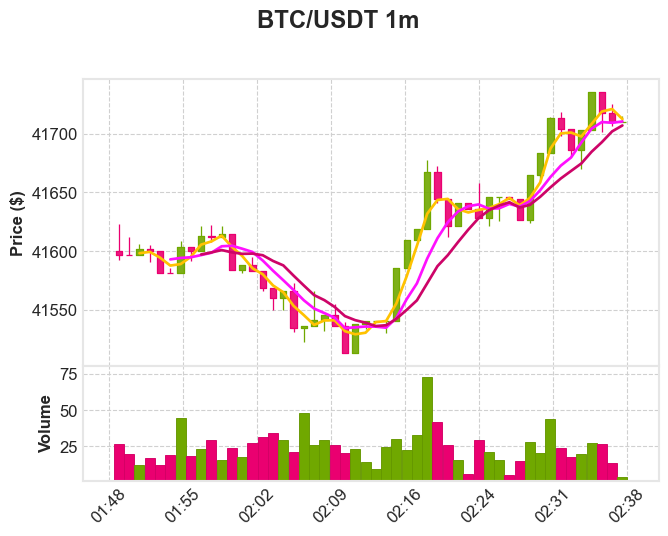

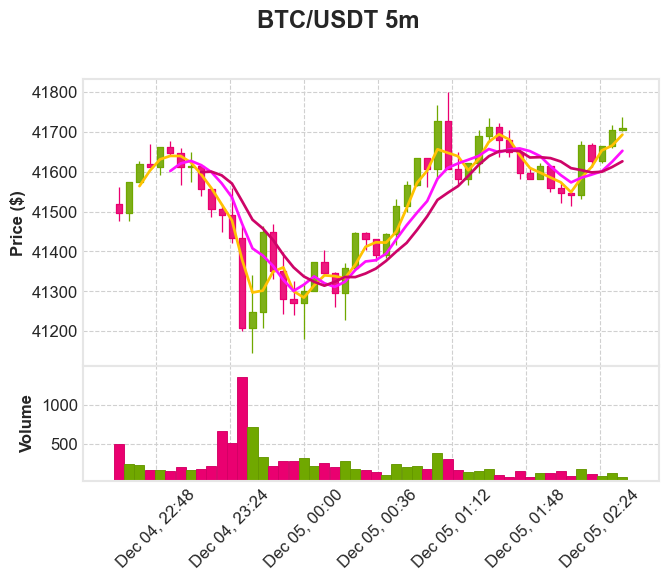

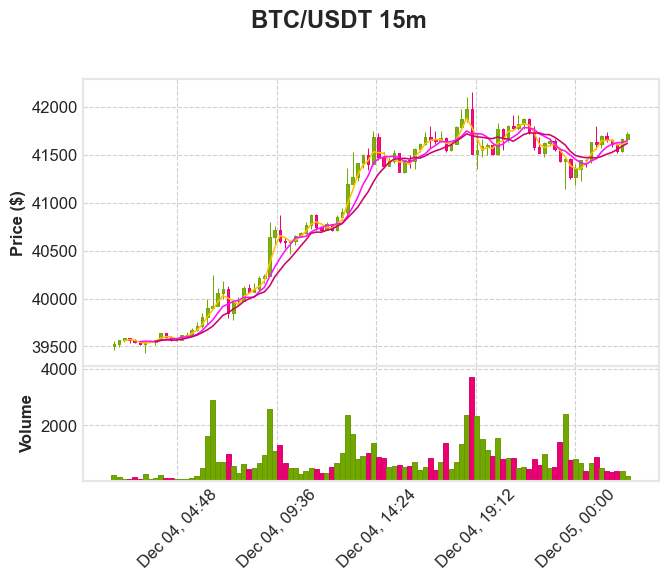

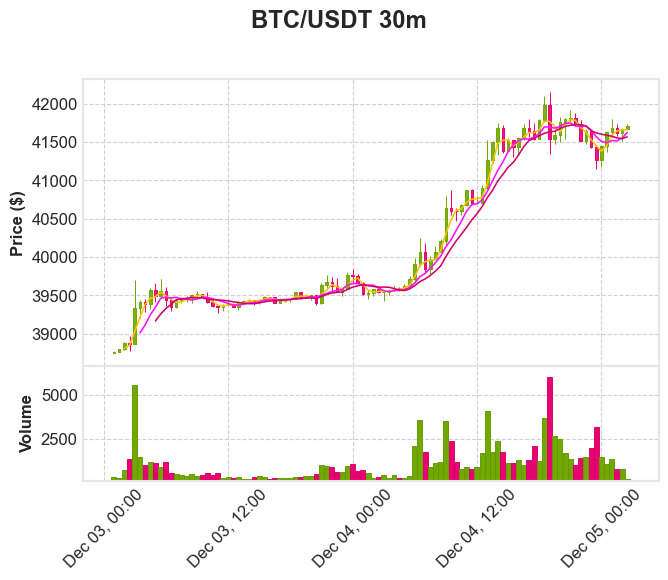

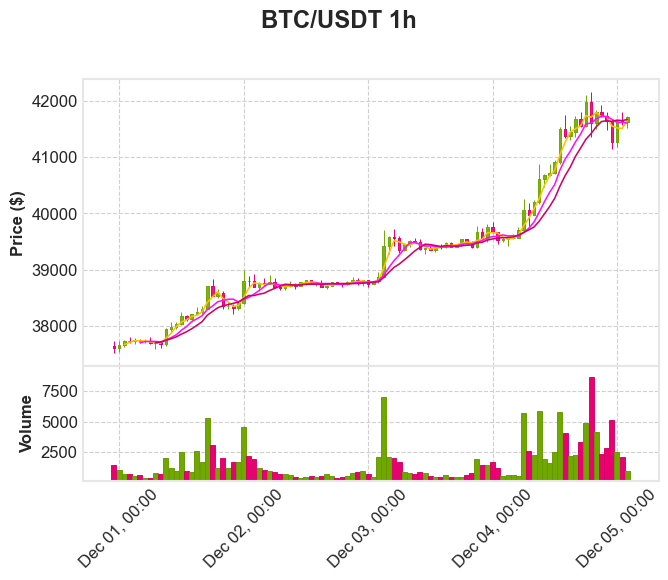

In [43]:

import ccxt
import mplfinance as mpf
import pandas as pd


def try_ccxt():
    exchange = ccxt.binance(config={
        'timeout': 200000,

        # use local http proxy
        'proxies': {
            'http': 'http://127.0.0.1:7890',
            'https': 'http://127.0.0.1:7890',
        }
    })

    ticker = exchange.fetch_ticker('BTC/USDT')
    df = pd.DataFrame(ticker)
    # logger.info(df)

    for (ts, limit) in [
        ('1m', 50),
        ('5m', 50),  # 5分钟, 100 条
        ('15m', 100),
        ('30m', 100),
        ('1h', 100)
    ]:
        df = pd.DataFrame(
            exchange.fetch_ohlcv(
                'BTC/USDT',
                timeframe=ts,
                limit=limit
            ),
            columns=['time', 'open', 'high', 'low', 'close', 'volume']
        )
        # 绘制图表
        df.set_index('time', inplace=True)
        # 时间改为北京时间
        df.index = pd.to_datetime(df.index, unit='ms') + pd.Timedelta(hours=8)
        # 画出开盘/收盘价格对比图
        # df[['open', 'close', 'high', 'low']].plot()

        # K线图
        mpf.plot(
            df,
            type='candle',
            style='binance',  # style='yahoo', 'charles', 'nightclouds', binance
            ylabel='Price ($)',
            mav=(3, 6, 9),
            volume=True,
            show_nontrading=True,
            title=f'BTC/USDT {ts}',
        )

    # 5m K线

    # plt.title('BTC/USDT')
    # plt.show()


try_ccxt()